# Worksheet 18

Name: Suin Lee  
UID: U68592929

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

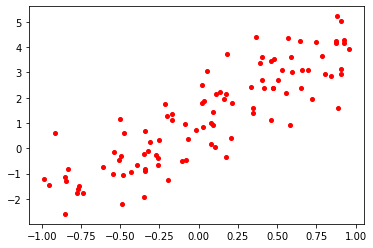

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

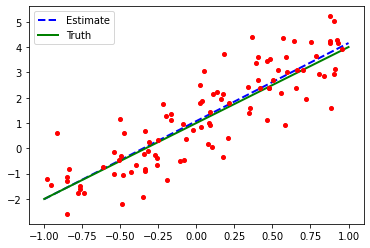

In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The parameter values are [1, 3] and the estimated beta values are [1.21, 3.08]. The estimated values are slightly overestimated which can be from the random noise added to the 'y' data during generation. 

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

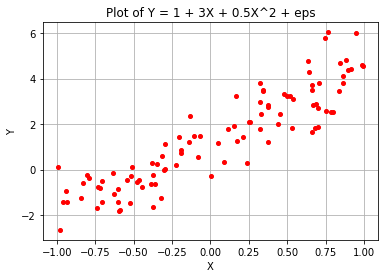

In [3]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

X = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

eps = np.random.randn(SAMPLE_SIZE)

Y = 1 + 3 * X + 0.5 * X**2 + eps

plt.plot(X, Y, 'ro', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Y = 1 + 3X + 0.5X^2 + eps')
plt.grid(True)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

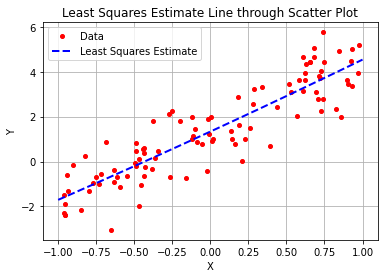

In [4]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

X = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

eps = np.random.randn(SAMPLE_SIZE)

Y = 1 + 3 * X + 0.5 * X**2 + eps

X_matrix = np.column_stack((np.ones(SAMPLE_SIZE), X, X**2))

beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

X_plot = np.linspace(-1, 1, 200)  
Y_est = beta_hat[0] + beta_hat[1] * X_plot + beta_hat[2] * X_plot**2

plt.plot(X, Y, 'ro', markersize=4, label='Data')
plt.plot(X_plot, Y_est, 'b--', lw=2, label='Least Squares Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Estimate Line through Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated beta values ([1.07,3.36,0.14] from the least squares regression, when compared with the original parameters ([1,3,0.5]
used to generate the data, show a close match for the intercept and linear term, but a significant underestimation for the quadratic term

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

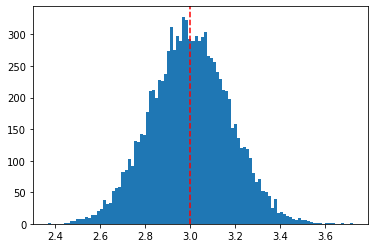

In [6]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, 0.5])
SAMPLE_SIZE = 100

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    eps = np.random.randn(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + eps
    intercept = np.ones(SAMPLE_SIZE)
    X = np.array([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

plt.hist(np.array(betas)[:, 1], bins=100)  # Histogram for the linear coefficient of X
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')  # True linear coefficient
plt.show()
